In [1]:
#predict what kind of flower based on length of petals
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys() #columns in the data set

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris['target_names'] #possible flowers

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris['feature_names'] #measurements

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
type(iris['data']) #array of flowers

numpy.ndarray

In [6]:
iris['target'] #the species associated with each flower, setosa=0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#split 75-25 to training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
random_state=0)

In [10]:
X_train.shape

(112, 4)

In [9]:
X_test.shape

(38, 4)

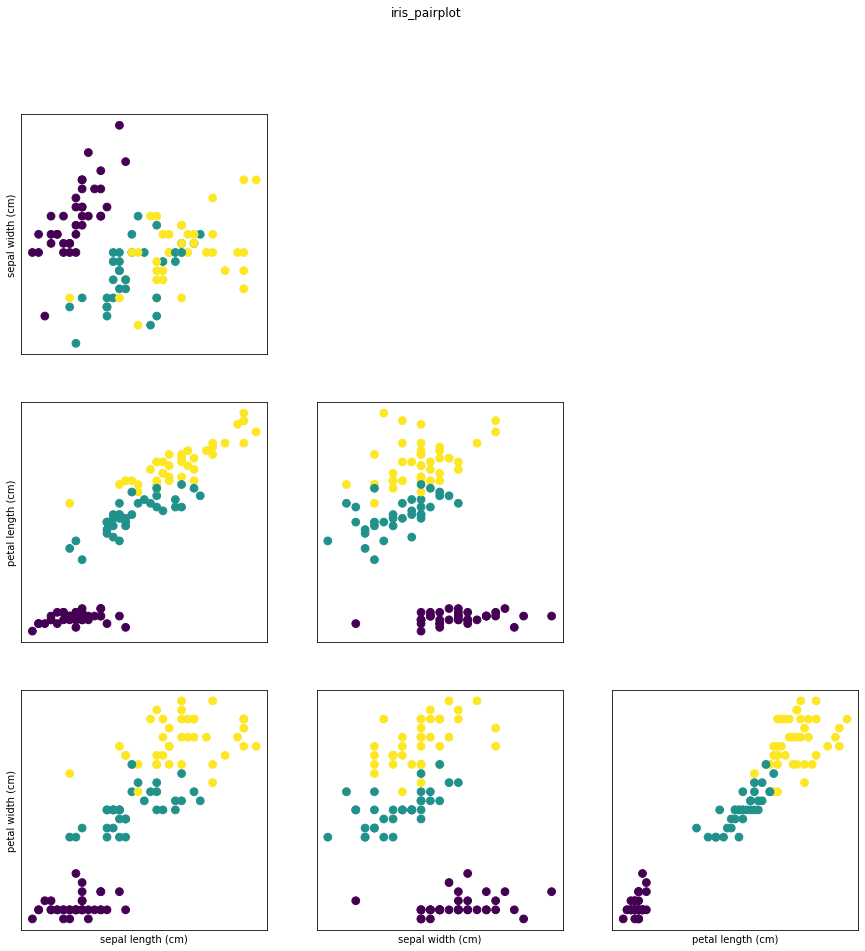

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

In [17]:
#implement K Nearest Neighbor machine learning model (find the closest neighbor to the test data)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
#input parameters
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=1, p=2,
weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
#test with a new data point to see prediction
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [21]:
#evaluating the model
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test) #testing accuracy, % we guessed right

0.9736842105263158

In [22]:
#also could do this instead
knn.score(X_test, y_test)

0.9736842105263158